<a href="https://colab.research.google.com/github/thdk13/deep-learning/blob/master/progress_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install lazypredict

In [3]:
import lazypredict

In [4]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
lazypredict.Supervised.REGRESSORS = lazypredict.Supervised.REGRESSORS[18:28]
del(lazypredict.Supervised.REGRESSORS[9])

In [6]:
lazypredict.Supervised.REGRESSORS


[('LarsCV', sklearn.linear_model._least_angle.LarsCV),
 ('Lasso', sklearn.linear_model._coordinate_descent.Lasso),
 ('LassoCV', sklearn.linear_model._coordinate_descent.LassoCV),
 ('LassoLars', sklearn.linear_model._least_angle.LassoLars),
 ('LassoLarsCV', sklearn.linear_model._least_angle.LassoLarsCV),
 ('LassoLarsIC', sklearn.linear_model._least_angle.LassoLarsIC),
 ('LinearRegression', sklearn.linear_model._base.LinearRegression),
 ('LinearSVR', sklearn.svm._classes.LinearSVR),
 ('MLPRegressor', sklearn.neural_network._multilayer_perceptron.MLPRegressor)]

In [7]:
data_path = 'drive/My Drive/data/'
import os
data = pd.read_csv(os.path.join(data_path,'MHC_peptide.csv'))

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40
0,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.15,0.00,0.08,0.08,0.08,0.00,0.00,0.15,0.08,0.00,0.08,0.06,0.00,0.03,0.09,0.18,0.12,0.03,0.06,0.00,0.09,0.09,0.03,0.00,0.03,0.03,0.03,0.06,0.03,0.00,0.06
1,0.07,0.00,0.14,0.14,0.07,0.14,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.07,0.07,0.07,0.14,0.00,0.00,0.06,0.00,0.03,0.09,0.18,0.12,0.03,0.06,0.00,0.09,0.09,0.03,0.00,0.03,0.03,0.03,0.06,0.03,0.00,0.06
2,0.47,0.00,0.07,0.00,0.00,0.07,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.07,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.00,0.03,0.09,0.18,0.12,0.03,0.06,0.00,0.09,0.09,0.03,0.00,0.03,0.03,0.03,0.06,0.03,0.00,0.06
3,0.33,0.00,0.07,0.07,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.07,0.00,0.07,0.07,0.00,0.07,0.07,0.00,0.00,0.06,0.00,0.03,0.09,0.18,0.12,0.03,0.06,0.00,0.09,0.09,0.03,0.00,0.03,0.03,0.03,0.06,0.03,0.00,0.06
4,0.47,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.13,0.00,0.00,0.07,0.06,0.00,0.03,0.09,0.18,0.12,0.03,0.06,0.00,0.09,0.09,0.03,0.00,0.03,0.03,0.03,0.06,0.03,0.00,0.06


In [10]:
#data split
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.25)

In [11]:
from sklearn.metrics import mean_absolute_error

In [12]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, predictions=True, custom_metric=mean_absolute_error)
models, predictions = reg.fit(X_trn, X_tst, y_trn, y_tst)

100%|██████████| 9/9 [01:23<00:00,  9.33s/it]


In [13]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,mean_absolute_error
Model,,,,,
MLPRegressor,0.43,0.44,0.20,28.84,0.15
LinearRegression,0.19,0.19,0.24,0.40,0.19
LassoLarsCV,0.19,0.19,0.24,1.36,0.19
LassoLarsIC,0.19,0.19,0.24,0.35,0.19
LassoCV,0.19,0.19,0.24,9.33,0.19
LarsCV,0.17,0.18,0.24,1.59,0.20
LinearSVR,0.17,0.17,0.24,41.51,0.19
Lasso,-0.00,-0.00,0.26,0.27,0.22
LassoLars,-0.00,-0.00,0.26,0.28,0.22


In [14]:
#plot the r2-score for the first 10 models
import matplotlib.pyplot as plt
import seaborn as sns



[(0.0, 1.0)]

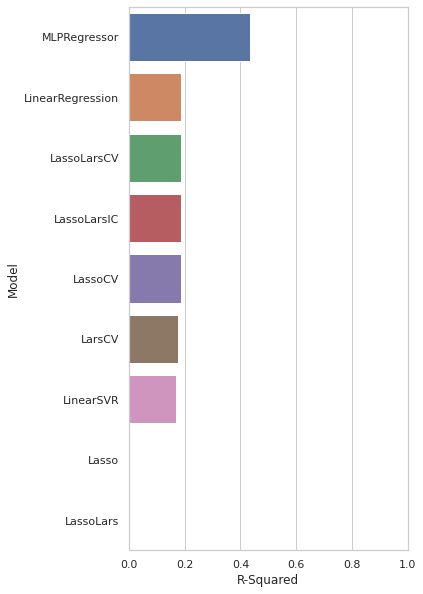

In [15]:
plt.figure(figsize=(5,10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y=models.index,x='R-Squared',data=models)
ax.set(xlim=(0,1))